<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/4526/logos/front_page.png" width="500">

<h1>Kaggle Competition - "What's Cooking?"</h1>
<h2>CSCD 429 Data Mining - Final Project</h2>
<h4>Andrew Combs, Eli Swanson, Richard Teller, Mike Lutch</h4>
<hr>

### Problem Overview

The point of this competition is to, given a list of ingredients for a recipe, predict the cuisine of the recipe.  Examples of cuisines are: italian, mexican, thai, japanese, spanish, etc.

- The training data is given in json format with the list of ingredients paired with the type of cuisine that the recipe is.

- The test data simply consists of the lists of ingredients for each recipe.

Thus we have a supervised, multi-class, classification problem.

### Data Analysis and Cleaning

Let's load in the data and see what we can discover.  Throughout this section we will be manipulating the training data and cleaning it.  Any steps we take that are successful in preparing the data we will also apply to the test set as well.

In [1]:
# Preliminaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from wordcloud import WordCloud

COLOR = '#80aaff' # The color we will use to graph our data

In [2]:
train_data = pd.read_json('./Data/train.json')
test_data = pd.read_json('./Data/test.json')

train_data.head(10)

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli..."
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo..."
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por..."
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-..."


In [3]:
print(train_data.shape)
print(test_data.shape)

(39774, 3)
(9944, 2)


So we see there are:
- 39774 training tuples
- 9944 test tuples

Let's see how many different cuisines there are.

In [4]:
from collections import Counter

cuisine_counts = Counter(train_data['cuisine'])
print("Number of unique cuisines: {}".format(len(cuisine_counts.keys())))

Number of unique cuisines: 20


<BarContainer object of 20 artists>

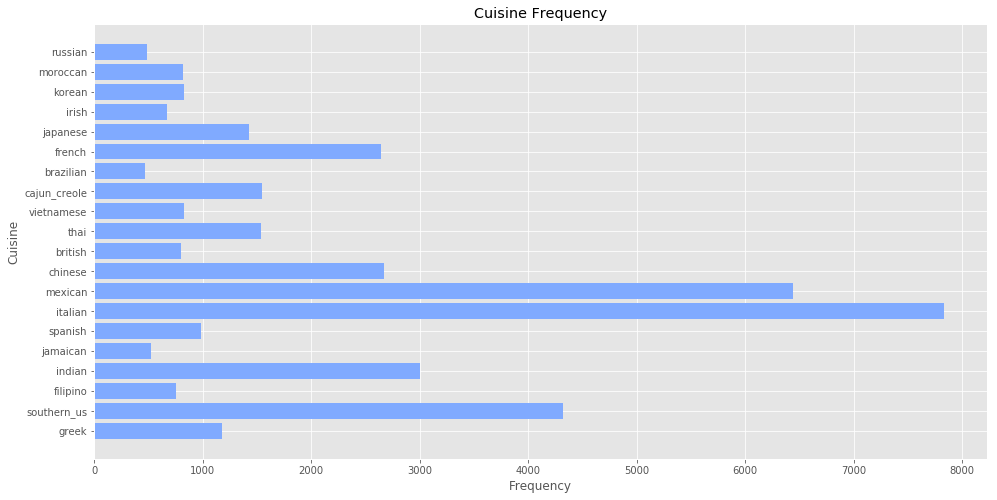

In [5]:
plt.figure(figsize=(16,8))
plt.xlabel('Frequency')
plt.ylabel('Cuisine')
plt.title('Cuisine Frequency')
plt.barh(list(cuisine_counts.keys()), list(cuisine_counts.values()), color=COLOR)

Currently the ingredients are a list object.  Let's transform each ingredient list into a string where each ingredient is separated by a comma.

We will also determine the number of ingredients for each recipe and tack both of these onto the dataframe as columns.

In [6]:
train_data['ingredients_text'] = train_data['ingredients'].apply(lambda x: ', '.join(x))
train_data['num_ingredients'] = train_data['ingredients'].apply(lambda x: len(x))

# Perform the same action to the test data
test_data['ingredients_text'] = test_data['ingredients'].apply(lambda x: ', '.join(x))
test_data['num_ingredients'] = test_data['ingredients'].apply(lambda x: len(x))

train_data.head(10)

,cuisine,id,ingredients,ingredients_text,num_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce, black olives, grape tomatoes,...",9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour, ground pepper, salt, tomatoes, gr...",11
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs, pepper, salt, mayonaise, cooking oil, gr...",12
3,indian,22213,"[water, vegetable oil, wheat, salt]","water, vegetable oil, wheat, salt",4
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","black pepper, shallots, cornflour, cayenne pep...",20
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge...","plain flour, sugar, butter, eggs, fresh ginger...",12
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli...","olive oil, salt, medium shrimp, pepper, garlic...",13
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo...","sugar, pistachio nuts, white almond bark, flou...",10
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por...","olive oil, purple onion, fresh pineapple, pork...",13
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-...","chopped tomatoes, fresh basil, garlic, extra-v...",6


## Ingredient Analysis

<BarContainer object of 43 artists>

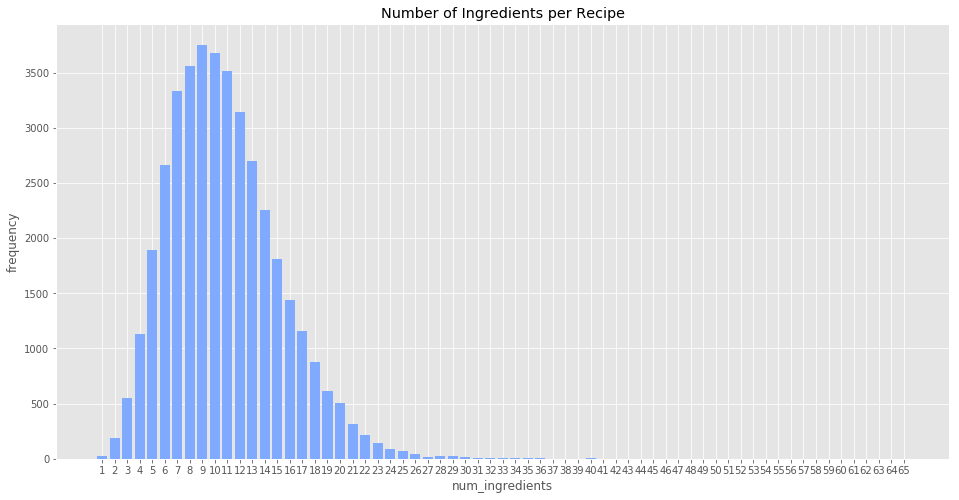

In [7]:
num_ingredients_counts = Counter(train_data['num_ingredients'])

plt.figure(figsize=(16,8))
plt.xlabel('num_ingredients')
plt.ylabel('frequency')
plt.title('Number of Ingredients per Recipe')
plt.xticks(range(min(num_ingredients_counts.keys()), max(num_ingredients_counts.keys())+1))
plt.bar(list(num_ingredients_counts.keys()), list(num_ingredients_counts.values()), color=COLOR)

In [8]:
print("Max ingredients in a recipe: {}".format(max(num_ingredients_counts.keys())))

Max ingredients in a recipe: 65


By observation from the previous graph, we can see that there are recipes with only 1 ingredient, and there are some recipes with more than 30 ingredients.  Should we consider these as outliers? Let's take a closer look at them.

In [9]:
one_ingr_recipes = train_data[train_data['num_ingredients'] <= 1]
one_ingr_recipes

,cuisine,id,ingredients,ingredients_text,num_ingredients
940,japanese,4734,[sushi rice],sushi rice,1
2088,vietnamese,7833,[dried rice noodles],dried rice noodles,1
6787,indian,36818,[plain low-fat yogurt],plain low-fat yogurt,1
7011,indian,19772,[unsalted butter],unsalted butter,1
8181,japanese,16116,[udon],udon,1
8852,thai,29738,[sticky rice],sticky rice,1
8990,indian,41124,[butter],butter,1
10506,mexican,32631,[corn tortillas],corn tortillas,1
13178,thai,29570,[grained],grained,1
17804,southern_us,29849,[lemonade concentrate],lemonade concentrate,1


While this is strange to have recipes containing only one ingredient, we will not remove them from the training data since we also see that there are such recipes in the test data as well that only contain 1 ingredient.

In [10]:
one_ingr_recipes = test_data[test_data['num_ingredients'] <= 1]
one_ingr_recipes

,id,ingredients,ingredients_text,num_ingredients
544,36822,[plain low-fat yogurt],plain low-fat yogurt,1
3248,34002,[glutinous rice],glutinous rice,1
3444,28414,[pimentos],pimentos,1
3621,10077,[sweetened condensed milk],sweetened condensed milk,1
4021,32883,[unsalted butter],unsalted butter,1
7417,45798,[chiles],chiles,1
8081,45398,[parmesan cheese],parmesan cheese,1
9407,32743,[shiitake],shiitake,1


Let's look at the ingredients individually to see what kinds of ingredients there are.

In [11]:
# We will extract all of the individual ingredients and add them into one list.

ingredients_distinct = {"abc"} # Use a set object so we only have one instance of each ingredient.

ingredientsByRecipe = train_data['ingredients']

for recipe in ingredientsByRecipe:
    for ingr in recipe:
        ingredients_distinct.add(ingr)

ingredients_distinct.remove('abc')
ingredients_distinct = list(ingredients_distinct) # Convert to list so we can sort it
ingredients_distinct.sort()

print('Total number of distinct ingredients: %d\n' % len(ingredients_distinct))

for ingr in ingredients_distinct:
    print(ingr)


Total number of distinct ingredients: 6714

(    oz.) tomato sauce
(   oz.) tomato paste
(10 oz.) frozen chopped spinach
(10 oz.) frozen chopped spinach, thawed and squeezed dry
(14 oz.) sweetened condensed milk
(14.5 oz.) diced tomatoes
(15 oz.) refried beans
1% low-fat buttermilk
1% low-fat chocolate milk
1% low-fat cottage cheese
1% low-fat milk
2 1/2 to 3 lb. chicken, cut into serving pieces
2% low fat cheddar chees
2% low-fat cottage cheese
2% lowfat greek yogurt
2% milk shredded mozzarella cheese
2% reduced-fat milk
25% less sodium chicken broth
33% less sodium cooked deli ham
33% less sodium cooked ham
33% less sodium ham
33% less sodium smoked fully cooked ham
40% less sodium taco seasoning
40% less sodium taco seasoning mix
7 Up
8 ounc ziti pasta, cook and drain
95% lean ground beef
A Taste of Thai Rice Noodles
Accent Seasoning
Adobo All Purpose Seasoning
Alaskan king crab legs
Alexia Waffle Fries
Alfredo sauce
Amarena cherries
Amaretti Cookies
American cheese
Anaheim chile
An

confit
confit duck leg
conger eel
converted rice
cook egg hard
cooked bacon
cooked barley
cooked beetroot
cooked bone in ham
cooked brisket
cooked brown rice
cooked chicken
cooked chicken breasts
cooked deli ham
cooked fettuccini
cooked ham
cooked italian meatballs
cooked long-grain brown rice
cooked meat
cooked meatballs
cooked pumpkin
cooked quinoa
cooked rice
cooked rigatoni
cooked shrimp
cooked steak
cooked turkey
cooked vegetables
cooked vermicelli
cooked white rice
cooki vanilla wafer
cookie crumbs
cookies
cooking apples
cooking cream
cooking fat
cooking liquid
cooking oil
cooking salt
cooking sherry
cooking spray
cooking wine
cool whip
coriander
coriander powder
coriander seeds
corkscrew pasta
corn
corn bread
corn bread crumbs
corn chips
corn flakes
corn flour
corn grits
corn husks
corn kernel whole
corn kernels
corn mix muffin
corn muffin
corn niblets
corn oil
corn salsa
corn starch
corn syrup
corn tortilla chips
corn tortillas
corn-on-the-cob
cornbread
cornbread crumbs
cornbre

instant espresso
instant espresso granules
instant espresso powder
instant oats
instant potato flakes
instant pudding mix
instant rice
instant tapioca
instant tea powder
instant white rice
instant yeast
iodized salt
irish bacon
irish cream liqueur
irish oats
italian chicken sausage
italian eggplant
italian loaf
italian meatballs
italian pizza crust
italian plum tomatoes
italian pork sausage
italian rolls
italian salad dressing
italian salad dressing mix
italian sauce
italian sausage
italian seasoned dry bread crumbs
italian seasoning
italian seasoning mix
italian style rolls
italian style seasoning
italian style stewed tomatoes
italian tomatoes
italian vinaigrette
italian-style meatballs
jack
jack cheese
jack daniels
jackfruit
jaggery
jalape
jalapeno chilies
jam
jamaica
jamaican curry powder
jamaican jerk
jamaican jerk marinade
jamaican jerk rub
jamaican jerk season
jamaican jerk spice
jamaican pumpkin
jamaican rum
jambalaya
jambalaya mix
jambalaya rice mix
jambon de bayonne
jamon serr

rye whiskey
saba
sablefish
sack
safflower
safflower oil
saffron
saffron powder
saffron threads
sage
sage leaves
sago
sago pearls
sake
saki
salad
salad dressing
salad dressing mix
salad greens
salad leaves
salad oil
salad seasoning mix
salami
salmon
salmon caviar
salmon fillets
salmon roe
salmon sashimi
salmon steaks
salsa
salsa verde
salsify
salt
salt and ground black pepper
salt free cajun creole seasoning
salt free chili powder
salt free herb seasoning
salt free seasoning
salt free southwest chipotle seasoning
salt pork
salt water
salted anchovies
salted butter
salted cashews
salted dry roasted peanuts
salted fish
salted mixed nuts
salted peanuts
salted pistachios
salted roast peanuts
salted roasted almonds
salted roasted pecans
salted seaweed
saltine crumbs
saltines
saltpeter
sambal chile paste
sambal olek
sambal ulek
sambuca
samphire
sanding sugar
sandwich bread
sandwich buns
sandwich rolls
sandwich steak
sandwich wraps
sandwiches
sangria
sansho
sardines
sashimi grade tuna
sato imo

By browsing the ingredients above some of the things we can note are:
- Some ingredients are capatalized.  There may be duplicates because of this.
- Brand names are present.  Some brands may be specific to a region.
- Special characters are present, such as symbols and accent characters.
- There are forms of the same word, for example fuji apples versus fuji apple.
- Stop words are present, but it may not be a good idea to remove them. For example, "Sugar in the Raw" would turn into "Sugar Raw" removing the fact it was a brand and categorizing it as the same thing as raw sugar.

From these observations we will:
- Convert all text to lowercase.
- In the future consider lemmatization

In [12]:
# Convert the data to lower
train_data['ingredients_text'] = train_data['ingredients_text'].apply(lambda x: x.lower())
test_data['ingredients_text'] = test_data['ingredients_text'].apply(lambda x: x.lower())
train_data.head(10)

,cuisine,id,ingredients,ingredients_text,num_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce, black olives, grape tomatoes,...",9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour, ground pepper, salt, tomatoes, gr...",11
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs, pepper, salt, mayonaise, cooking oil, gr...",12
3,indian,22213,"[water, vegetable oil, wheat, salt]","water, vegetable oil, wheat, salt",4
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","black pepper, shallots, cornflour, cayenne pep...",20
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge...","plain flour, sugar, butter, eggs, fresh ginger...",12
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli...","olive oil, salt, medium shrimp, pepper, garlic...",13
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo...","sugar, pistachio nuts, white almond bark, flou...",10
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por...","olive oil, purple onion, fresh pineapple, pork...",13
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-...","chopped tomatoes, fresh basil, garlic, extra-v...",6


Now that the ingredients have been normalized, let's look at the frequency of the ingredients.

In [13]:
ingredients_all = []
ingredientsByRecipe = train_data['ingredients_text']

for recipe in ingredientsByRecipe:
    for ingr in recipe.split(', '):
        ingredients_all.append(ingr)
        
ingr_counts = Counter(ingredients_all)

<BarContainer object of 20 artists>

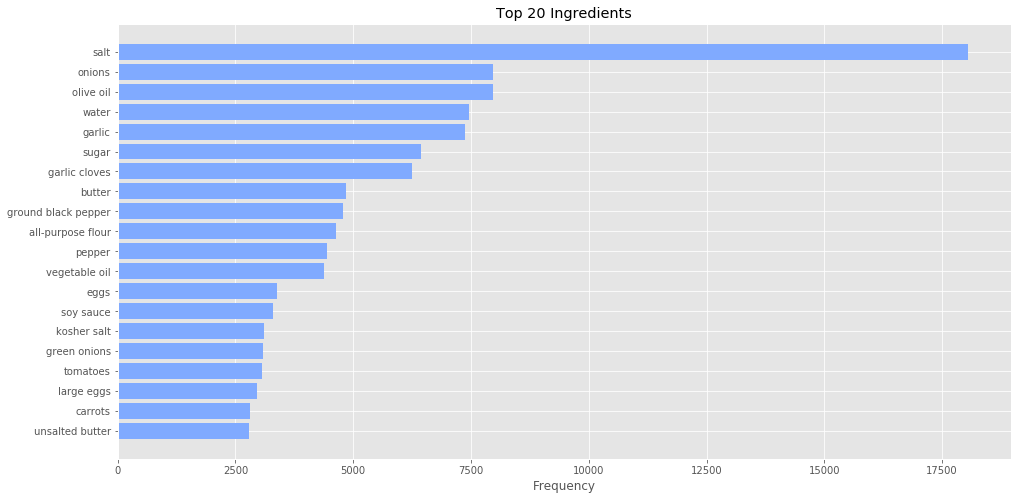

In [14]:
mostcommon = ingr_counts.most_common(20) # Returns list of tuples ('ingr', count)
mostcommoningr = [i[0] for i in mostcommon] # Retrieves ingredient in each tuple
mostcommoningr_counts = [i[1] for i in mostcommon] # Retrieves count in each tuple
mostcommoningr = list(reversed(mostcommoningr)) # Place most common at beginning of list
mostcommoningr_counts = list(reversed(mostcommoningr_counts))

plt.figure(figsize=(16,8))
plt.xlabel('Frequency')
plt.title('Top 20 Ingredients')
plt.barh(mostcommoningr, mostcommoningr_counts, color=COLOR)

Let's view the frequency of the ingredients as a wordcloud to see a little more than just the top 20.

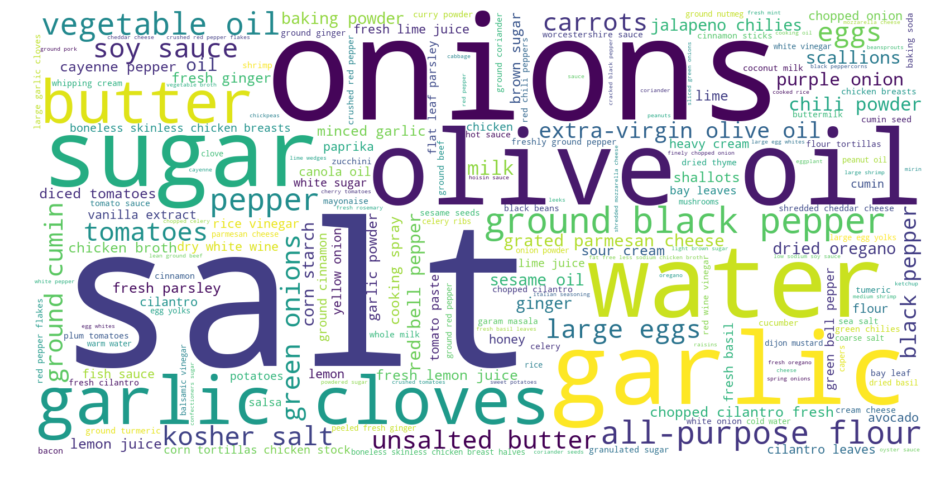

In [15]:
wordcloud = WordCloud(width=1600, height=800,random_state=21, background_color='white').generate_from_frequencies(ingr_counts)
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In summary, the data looks fairly clean, the ingredients as we see from the above visualizations look normal.
For now, the only prepocessing we will apply is:
- converting to lower case.

In the future we will consider:
- lemmatization
- misspellings.

## Create the Models

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data['ingredients_text'].tolist(), train_data['cuisine'].tolist(), test_size=.2, random_state=20)
X_train[:5] # Print the first 5 items

['lime, mung beans, sesame oil, peanut butter, carrots, fish sauce, fresh ginger, green onions, cilantro, garlic cloves, monterey jack, honey, hoisin sauce, red pepper, pizza doughs, boiling water, soy sauce, sriracha, cooked chicken, rice vinegar, oyster sauce',
 'eggs, decorating sugars, softened butter, white sugar, ground cinnamon, milk, salt, confectioners sugar, melted butter, active dry yeast, all-purpose flour, sour cream, warm water, vanilla extract, chopped pecans',
 'olive oil, crushed red pepper, tomatoes, kalamata, dried oregano, sun-dried tomatoes, onions, capers, garlic',
 'butter, spinach leaves, salt, rainbow trout, heavy cream, fennel, freshly ground pepper',
 'chicken stock, veal, all-purpose flour, dried porcini mushrooms, large garlic cloves, onions, marsala wine, fresh thyme, ground allspice, dried thyme, button mushrooms']

In [17]:
from sklearn.feature_extraction.text import *

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

nb = MultinomialNB().fit(X_train, y_train)
logReg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=200).fit(X_train, y_train)
tree = DecisionTreeClassifier().fit(X_train, y_train) # Uses Gini
rf = RandomForestClassifier(n_estimators=5).fit(X_train, y_train)

In [19]:
print("Naive Bayes: {}".format(nb.score(X_test, y_test)))
print("Logistic Regression: {}".format(logReg.score(X_test, y_test)))
print("Decision Tree: {}".format(tree.score(X_test, y_test)))
print("Random Forest: {}".format(rf.score(X_test, y_test)))

Naive Bayes: 0.6681332495285983
Logistic Regression: 0.7813953488372093
Decision Tree: 0.6203645505971087
Random Forest: 0.6424890006285355


Let's try one last attempt at something different from all of these, boosting.

In [20]:
from sklearn.ensemble import AdaBoostClassifier

logReg = LogisticRegression(solver='lbfgs', multi_class='multinomial')
rf = RandomForestClassifier(n_estimators=5)
adaboost = AdaBoostClassifier(base_estimator=rf, n_estimators=50)

In [21]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [22]:
adaboost.score(X_test, y_test)

0.6911376492771841

As we see, it did not help.

In conclusion, out of the models we tested above, we tried different hyperparameter settings, but the ones used above were the settings that gave the best results, therefore we assume that a Logistic Regression model works best for this problem.

The final accuracy score we achieved was 78.14%.  First place on Kaggle achieved about 82%.

In the future something we would definitely explore further is other metrics rather than accuracy to see if we can figure out where the model is going wrong, identify the problem, and then attempt to clean that portion of the data that is causing that problem, since we had such conflict with what to clean in the data.  Looking at the metrics would probably give us really good insight into what to clean.